In [40]:
#Scrap data from SWIGGY for restaurant Food_name and price

from bs4 import BeautifulSoup
import requests
import csv
import pandas as pd

url = "https://www.swiggy.com/restaurants/akka-bava-family-restaurant-nellore-area-nellore-501767"
p = requests.get(url)
soup = BeautifulSoup(p.content,'html.parser')
print(p)
content = soup.find_all('div', class_="_2wg_t")
fheader = ["Food_Name","Price"]

itemfull = []

for item in content:
  items = []
  Food_name = item.find('h3', class_="styles_itemNameText__3ZmZZ")
  price = item.find('div', class_="styles_itemPortionContainer__1u_tj")
  
  
  if(Food_name is not None):
    items.append(Food_name.text)
  else:
    items.append("Food_name is NA")
  if(price is not None):
    items.append(price.text)
  else:
    items.append("No Original Price")
  
  itemfull.append(items)

pd.DataFrame(itemfull).to_csv("food.csv",header=fheader)

<Response [200]>


In [50]:
import pandas as pd
data = pd.read_csv("food.csv")

In [51]:
#display the first five rows
data.head()

,SN_NO,Food_Name,Price
0,0,Veg Hot & Sour Soup [Family],59
1,1,Chicken Hot & Sour Soup [Family],79
2,2,Mutton Soup [Family],99
3,3,Leg PieceRoast [1pcs],69
4,4,Chicken fry [B],159


In [43]:
# display the last five rows
data.tail()

,Unnamed: 0,Food_Name,Price
69,69,Butter Naan,35
70,70,Plain Kulcha,35
71,71,Butter Kulcha,40
72,72,Panner Kulcha,45
73,73,Garlic Naan,45


<function matplotlib.pyplot.show(*args, **kw)>

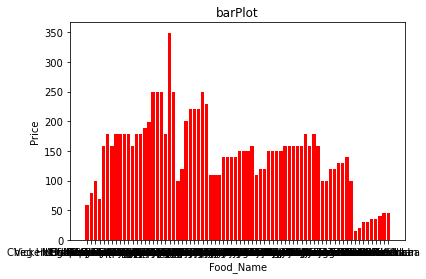

In [44]:
import matplotlib
import matplotlib.pyplot as plt
x = data.Food_Name
y = data.Price
plt.bar(x,y,color="red")
plt.xlabel("Food_Name")
plt.ylabel("Price")
plt.title("barPlot")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

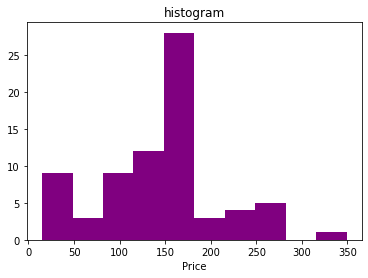

In [45]:
import matplotlib.pyplot as plt
x = data.Price
plt.hist(x,color="purple")
plt.xlabel("Price")
plt.title("histogram")
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



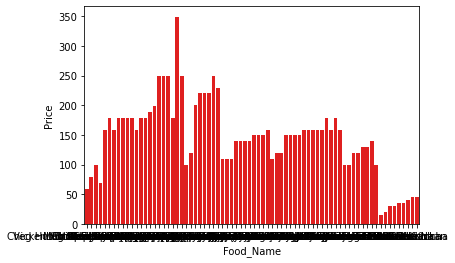

In [46]:
import seaborn as sns
x = data.Food_Name
y = data.Price
sns.barplot(x,y,color="red")
plt.show()

In [52]:
import plotly.express as px

fig = px.bar(data, x="Food_Name", y="Price", color="SN_NO", title="Long-Form Input")
fig.show()

In [53]:
import plotly.express as px
fig = px.pie(data, values='Price')
fig.show()

In [54]:
fig = px.box(data, y="Price")
fig.show()

(array([ 4.,  5.,  1.,  2.,  0.,  9.,  7.,  5., 18., 10.,  1.,  2.,  4.,
         0.,  5.,  0.,  0.,  0.,  0.,  1.]),
 array([ 15. ,  31.7,  48.4,  65.1,  81.8,  98.5, 115.2, 131.9, 148.6,
        165.3, 182. , 198.7, 215.4, 232.1, 248.8, 265.5, 282.2, 298.9,
        315.6, 332.3, 349. ]),
 <a list of 20 Patch objects>)

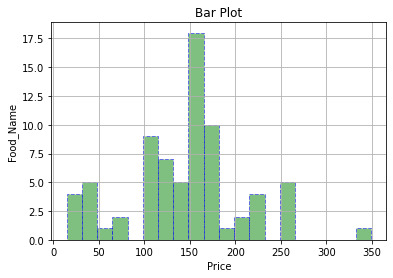

In [56]:
import matplotlib
import matplotlib.pyplot as plt
y = data.Food_Name
x = data.Price
plt.ylabel("Food_Name")
plt.xlabel("Price")
plt.title("Bar Plot")
plt.grid(True)
plt.hist(x, bins=20, color='green', edgecolor='blue',linestyle='--', alpha=0.5)

(array([ 4.,  5.,  1.,  2.,  0.,  9.,  7.,  5., 18., 10.,  1.,  2.,  4.,
         0.,  5.,  0.,  0.,  0.,  0.,  1.]),
 array([ 15. ,  31.7,  48.4,  65.1,  81.8,  98.5, 115.2, 131.9, 148.6,
        165.3, 182. , 198.7, 215.4, 232.1, 248.8, 265.5, 282.2, 298.9,
        315.6, 332.3, 349. ]),
 <a list of 20 Patch objects>)

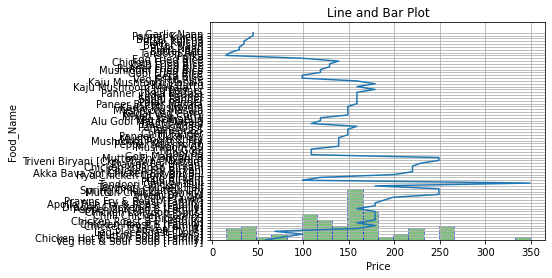

In [55]:
import matplotlib
import matplotlib.pyplot as plt
y = data.Food_Name
x = data.Price
lines=plt.plot(x,y)
plt.ylabel("Food_Name")
plt.xlabel("Price")
plt.title("Line and Bar Plot")
plt.grid(True)
plt.hist(x, bins=20, color='green', edgecolor='blue',linestyle='--', alpha=0.5)

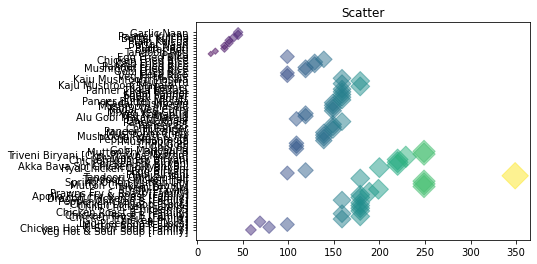

In [57]:
plt.title("Scatter")
plt.scatter(x, y, s=data['Price'], c=data['Price'], marker='D', alpha=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



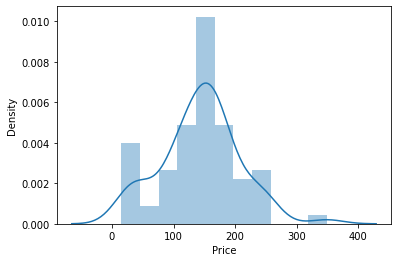

In [58]:
from pandas import read_csv
from seaborn import distplot
from matplotlib import pyplot
dataset = pd.read_csv('food.csv')
# create histogram plot
distplot(dataset['Price'])
# show plot
pyplot.show()

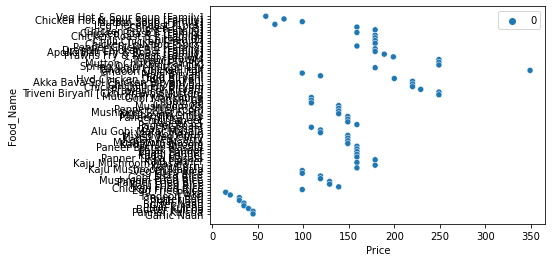

In [59]:
# scatter plot of two numerical variables vs class label
from pandas import read_csv
from seaborn import scatterplot
from matplotlib import pyplot
# create scatter plot
scatterplot(y='Food_Name', x='Price', hue=0, data=dataset)
# show plot
pyplot.show()

Text(0.5, 1.0, 'Heatmap')

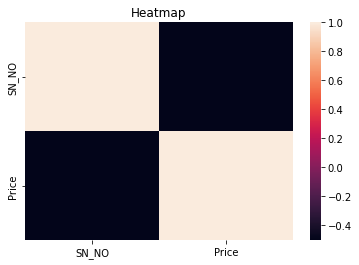

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns 
 
# first five entries of the tips dataset
data.head()
 
# correlation between the different parameters
tc = data.corr()
 
# plot a heatmap of the correlated data
sns.heatmap(tc)
plt.title("Heatmap")